## Faces Decomposition

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import offsetbox
import seaborn as sns; sns.set()
import numpy as np

## Dataset
This [dataset](http://vis-www.cs.umass.edu/lfw/) is a collection of JPEG pictures of famous people collected over the internet, all details are available on the official website:



Each picture is centered on a single face. The typical task is called Face Verification: given a pair of two pictures, a binary classifier must predict whether the two images are from the same person.

In [2]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=30)
faces.data.shape

(2370, 2914)

In [3]:
for name in faces.target_names[:10]:
    print(name)

Alejandro Toledo
Alvaro Uribe
Andre Agassi
Ariel Sharon
Arnold Schwarzenegger
Colin Powell
David Beckham
Donald Rumsfeld
George W Bush
Gerhard Schroeder


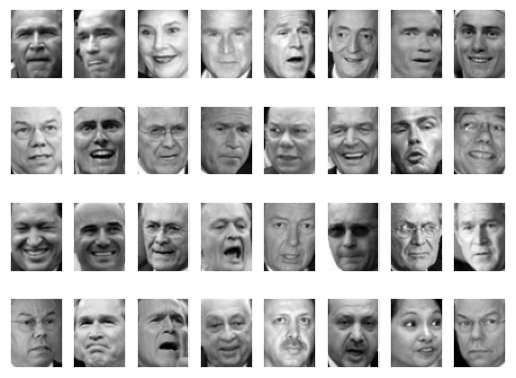

In [4]:
fig, ax = plt.subplots(4, 8, subplot_kw=dict(xticks=[], yticks=[]))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='gray')

In [5]:
def plot_components(data, model, images=None, ax=None,
                    thumb_frac=0.05, cmap='gray'):
    ax = ax or plt.gca()    
    proj = model.fit_transform(data)
    ax.plot(proj[:, 0], proj[:, 1], '.k')
    
    if images is not None:
        min_dist_2 = (thumb_frac * max(proj.max(0) - proj.min(0))) ** 2
        shown_images = np.array([2 * proj.max(0)])
        for i in range(data.shape[0]):
            dist = np.sum((proj[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist_2:
                # don't show points that are too close
                continue
            shown_images = np.vstack([shown_images, proj[i]])
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(images[i], cmap=cmap),
                                      proj[i])
            ax.add_artist(imagebox)

## PCA

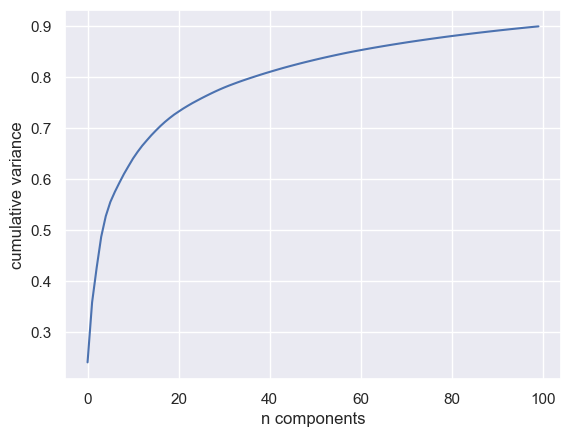

In [6]:
from sklearn.decomposition import PCA
model = PCA(100).fit(faces.data)
plt.plot(np.cumsum(model.explained_variance_ratio_))
plt.xlabel('n components')
plt.ylabel('cumulative variance');

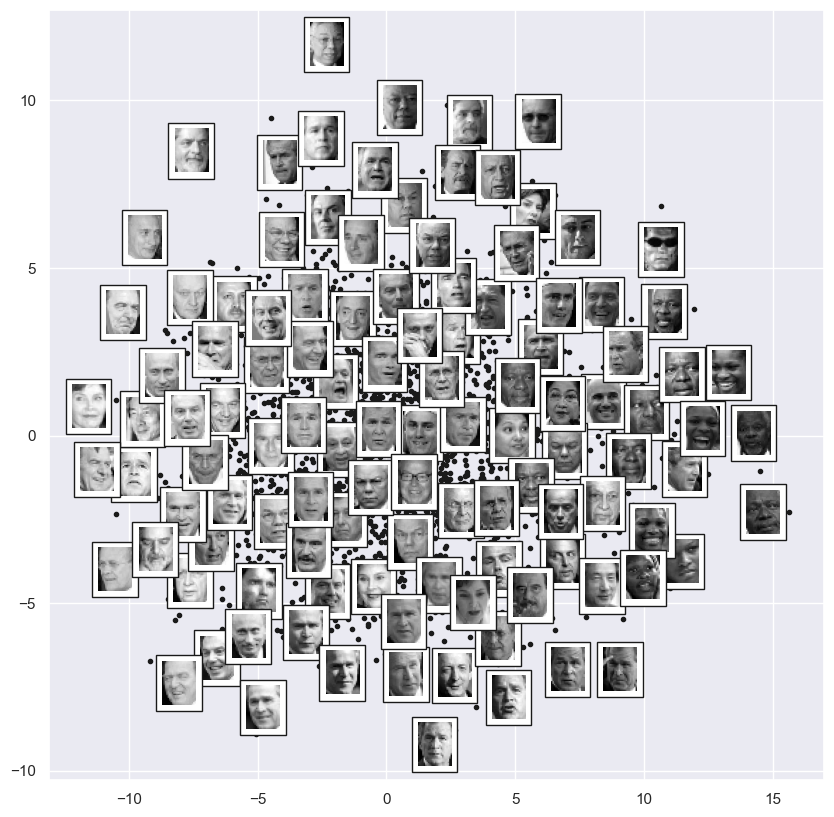

In [7]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_components(faces.data,
                model=PCA(2).fit(faces.data),
                images=faces.images[:, ::2, ::2])

In [8]:
from sklearn.manifold import Isomap
model = Isomap(n_components=2)
proj = model.fit_transform(faces.data)
proj.shape

(2370, 2)

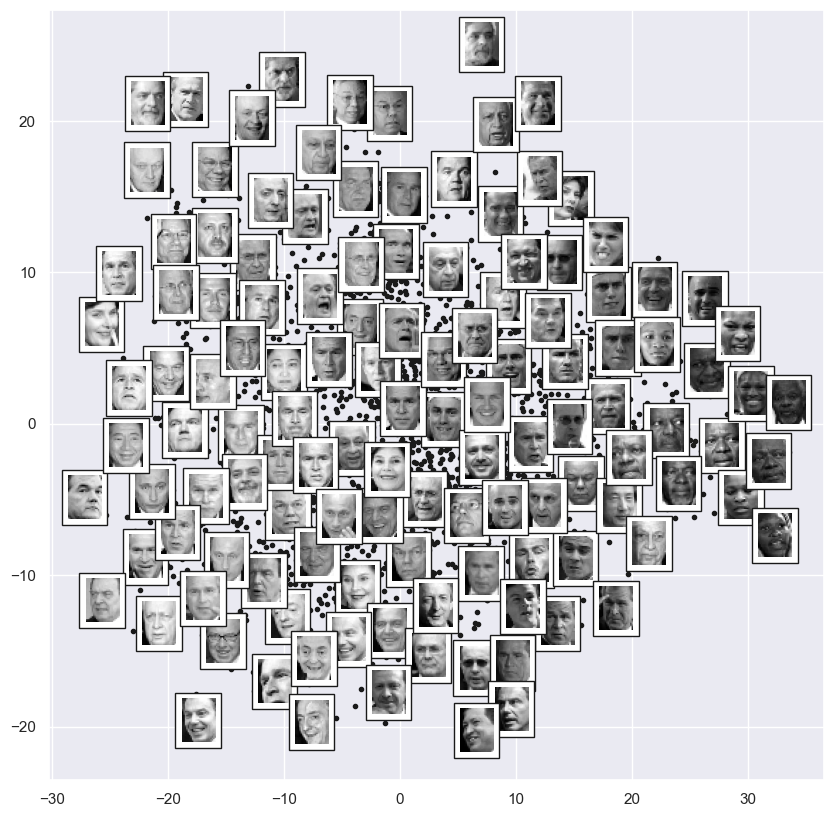

In [9]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_components(faces.data,
                model=Isomap(n_components=2).fit(faces.data),
                images=faces.images[:, ::2, ::2])